In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statannotations.Annotator import Annotator

fontsize = 13

plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [30]:
df_IF = pd.read_csv("../../data/IF_results/df_IF.csv")
df_IF = df_IF.drop("Unnamed: 0", axis=1)
df_IF.head()

,Image_name_x,Condition,M1: sum overlap / HP1a total,Number of total aggregates,Cell_type
0,2022-08-31_nuc1,Non-confined_HeLa,0.748414,10,HeLa
1,2022-08-31_nuc2,Non-confined_HeLa,0.904194,6,HeLa
2,2022-08-31_nuc3,Non-confined_HeLa,0.390247,20,HeLa
3,2022-08-31_nuc4,Non-confined_HeLa,0.480745,17,HeLa
4,2022-08-31_nuc5,Non-confined_HeLa,0.574911,9,HeLa


In [3]:
df_IF_all = pd.read_csv("../../data/IF_results/df_IF_all.csv")
df_IF_all = df_IF_all.drop("Unnamed: 0", axis=1)
df_IF_all.head()

,Condition,x_length
0,Non-confined_HeLa,1.237643
1,Non-confined_HeLa,0.352658
2,Non-confined_HeLa,1.217612
3,Non-confined_HeLa,1.050353
4,Non-confined_HeLa,0.479373


#### Figure 2 

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/4294806254.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_IF, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[0], size=5)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/4294806254.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/4294806254.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=outliers_df_combined, x="Condition", y=feature, order=labels, 

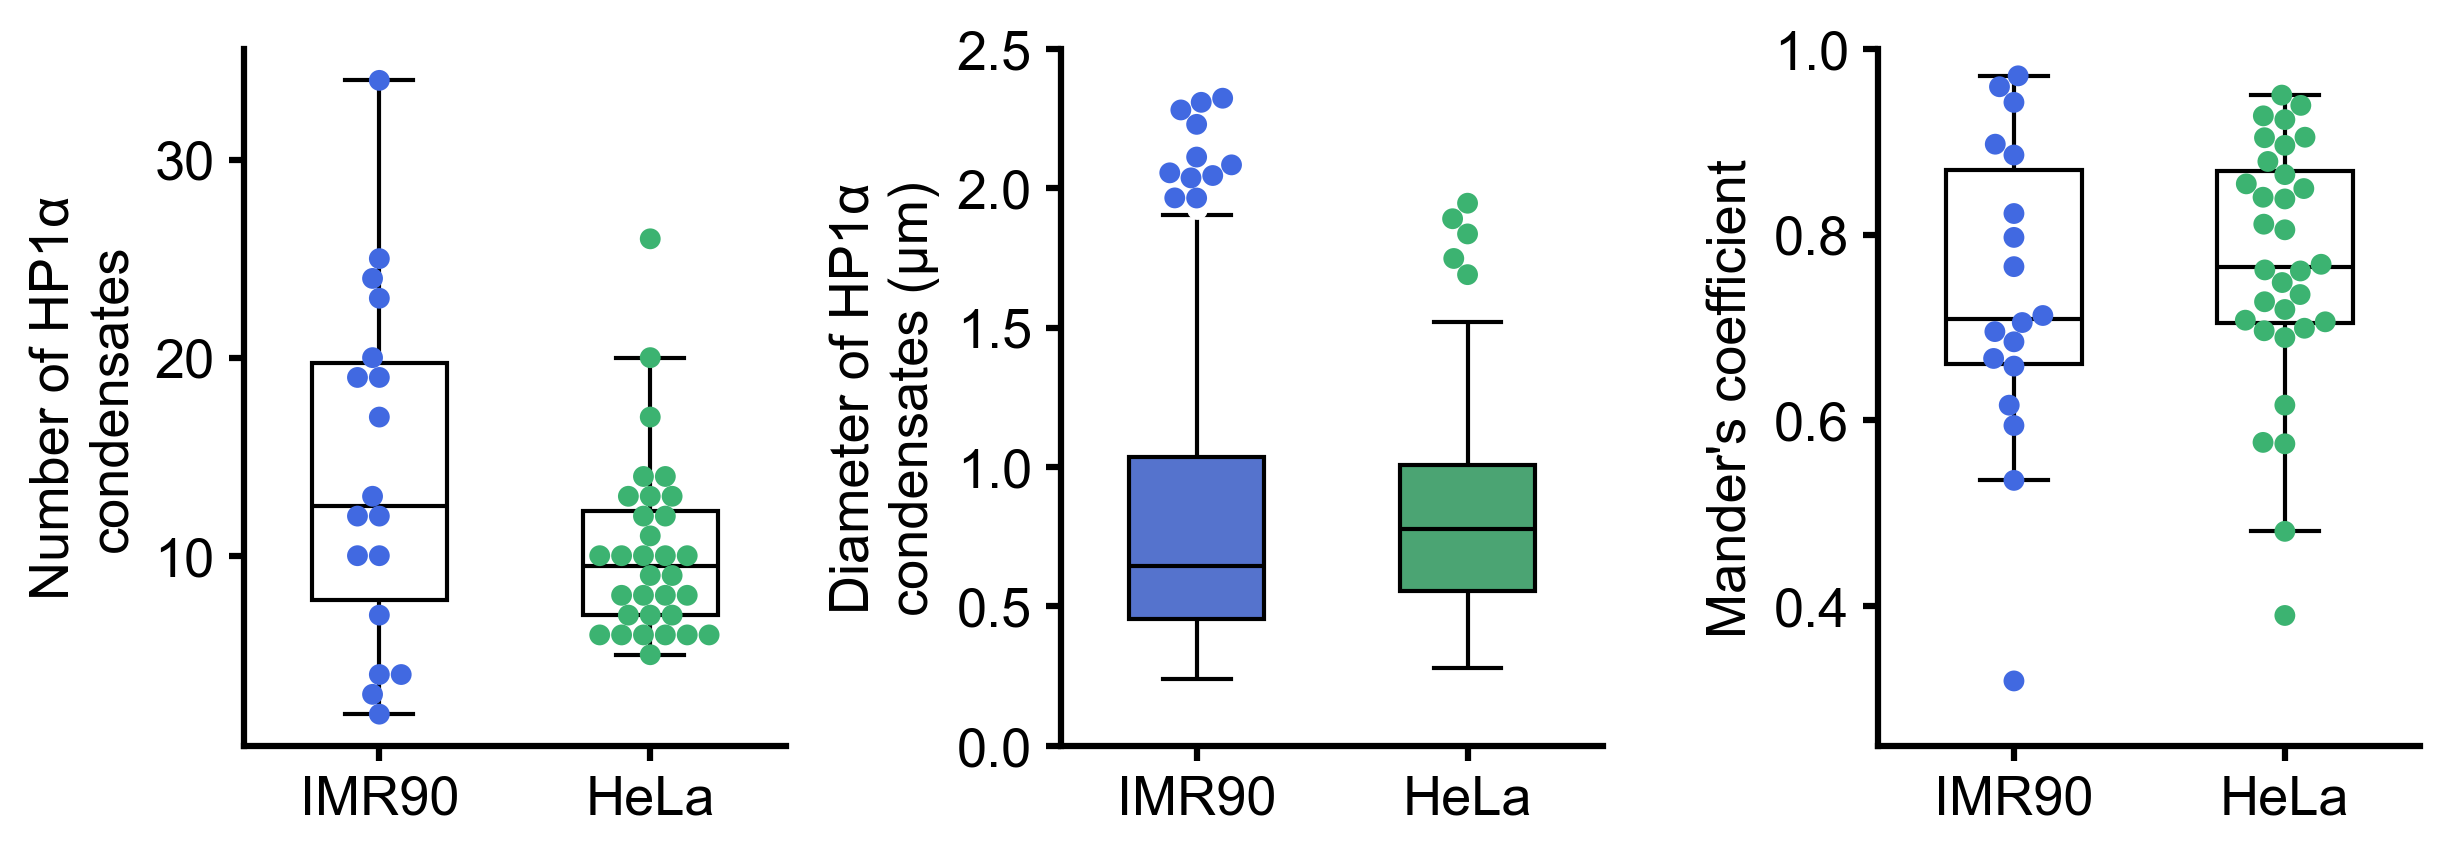

In [5]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=False
)

labels = ["Non-confined_IMR90", "Non-confined_HeLa"]
my_pal = {labels[0]: "royalblue", labels[1]: "mediumseagreen"}

feature = "Number of total aggregates"
sns.boxplot(
    data=df_IF,
    x="Condition",
    order=labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(data=df_IF, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[0], size=5)

axes[0].set(ylabel="Number of HP1α\ncondensates")
# axes[0].set_ylim(0, 40)
axes[0].set(xlabel=None)


feature = "x_length"
sns.boxplot(
    data=df_IF_all,
    x="Condition",
    order=labels,
    y=feature,
    palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


outliers_df_HeLa = df_IF_all[(df_IF_all["Condition"] == labels[1]) & (df_IF_all[feature] > 1.6)]
outliers_df_IMR90 = df_IF_all[(df_IF_all["Condition"] == labels[0]) & (df_IF_all[feature] > 1.95)]

outliers_df_combined = pd.concat([outliers_df_HeLa, outliers_df_IMR90])

sns.swarmplot(data=outliers_df_combined, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[1], size=5)


axes[1].set(ylabel="Diameter of HP1α\ncondensates (µm)")
axes[1].set_ylim(0, 2.5)
axes[1].set(xlabel=None)


feature = "M1: sum overlap / HP1a total"
sns.boxplot(
    data=df_IF,
    x="Condition",
    order=labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[2],
)

sns.swarmplot(data=df_IF, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[2], size=5)

axes[2].set(ylabel=r"Mander's coefficient")
axes[2].set_ylim(0.25, 1)
axes[2].set(xlabel=None)

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
axes[2].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[2].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[2].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)

for p in axes[2].texts:
    p.set_fontsize(fontsize)


new_confiner_labels_IMR90 = ["IMR90", "HeLa"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_IMR90)
axes[2].set_xticklabels(new_confiner_labels_IMR90)


plt.savefig("../../Figures/Figure2/Figure2C_D_E.pdf", bbox_inches="tight", dpi=300)


plt.show()

#### Supplementary 

#### Supplementary Figure 3

In [6]:
df_IF_IMR90_sum = pd.read_csv("../../data/IF_results/df_IF_IMR90_sum.csv")
df_IF_HeLa_sum = pd.read_csv("../../data/IF_results/df_IF_HeLa_sum.csv")

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/460951289.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/460951289.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_IF_HeLa_sum, x="Condition", y=feature, order=labels_HeLa, palette=my_pal_HeLa, ax=axes[1], size=5)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/460951289.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/46

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined: Mann-Whitney-Wilcoxon test two-sided, P_val:1.110e-02 U_stat=2.700e+01


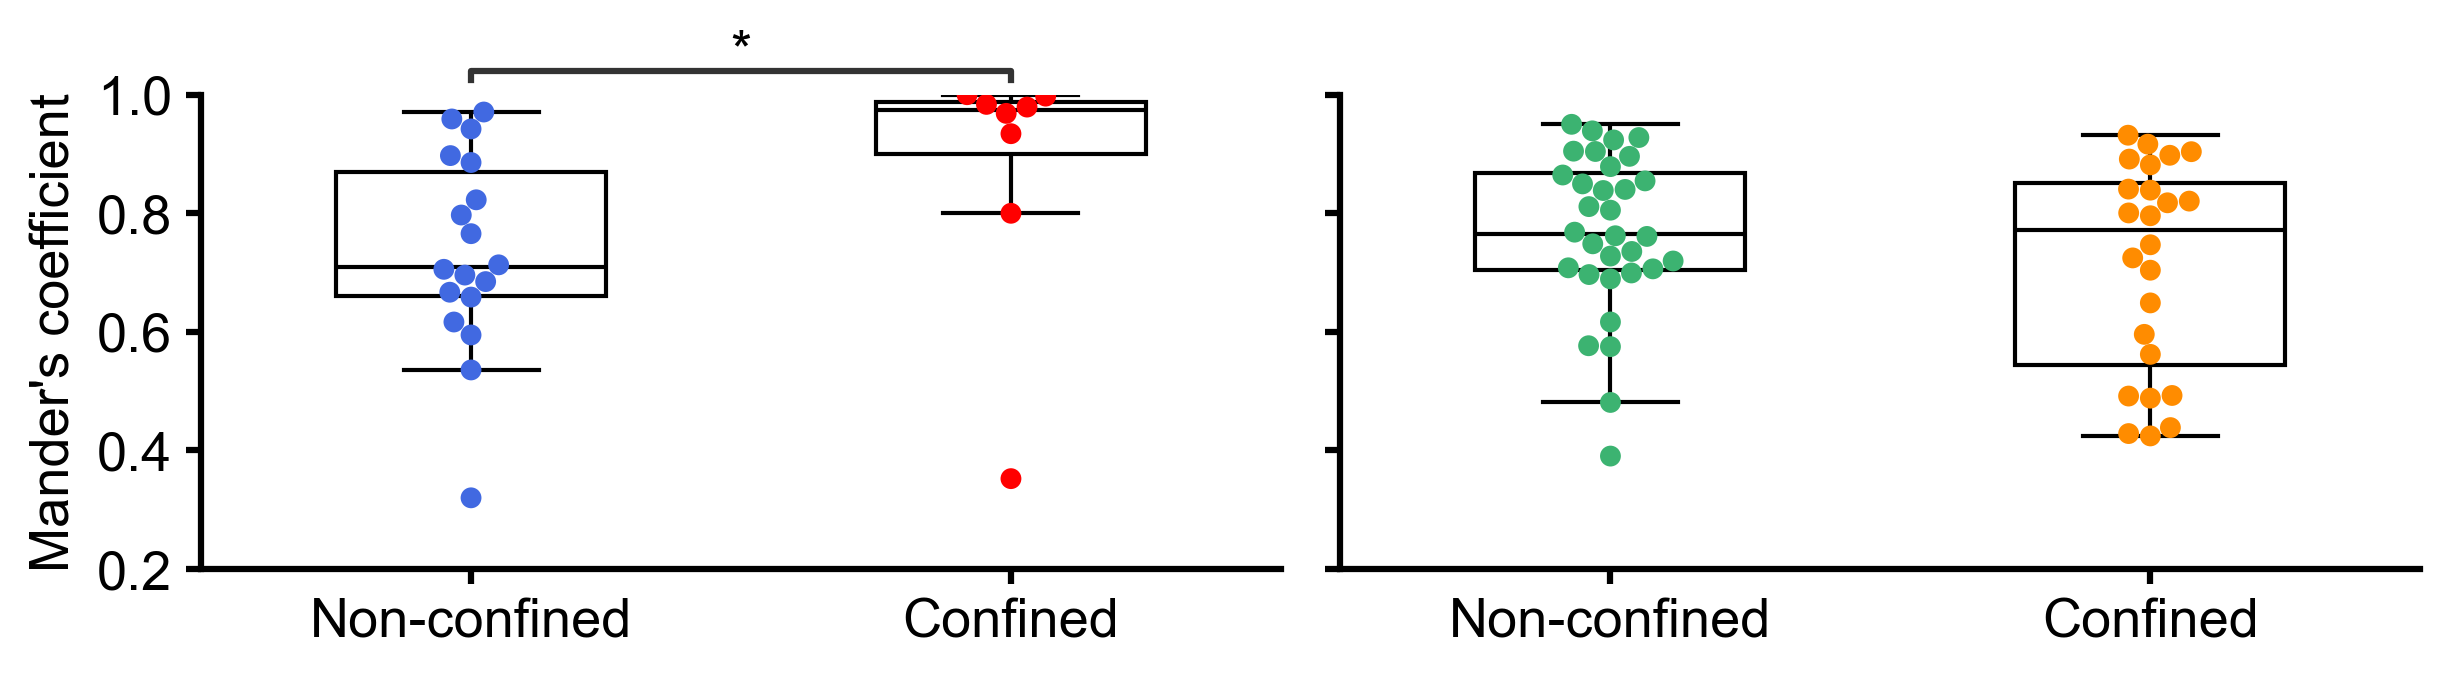

In [13]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 60

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

labels_IMR90 = ["Non-Confined", "Confined"]
my_pal_IMR90 = {labels_IMR90[0]: "royalblue", labels_IMR90[1]: "red"}

labels_HeLa = ["Non-Confined", "Confined"]
my_pal_HeLa = {labels_HeLa[0]: "mediumseagreen", labels_HeLa[1]: "darkorange"}


feature = "M1: sum overlap / HP1a total"
sns.boxplot(
    data=df_IF_IMR90_sum,
    x="Condition",
    order=labels_IMR90,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_IF_IMR90_sum, x="Condition", y=feature, order=labels_IMR90, palette=my_pal_IMR90, ax=axes[0], size=5
)

axes[0].set(ylabel=r"Mander's coefficient")
axes[0].set_ylim(0.2, 1)
axes[0].set(xlabel=None)

pairs = [(labels_IMR90[0], labels_IMR90[1])]

annotator = Annotator(ax=axes[0], pairs=pairs, data=df_IF_IMR90_sum, x="Condition", y=feature, order=labels_IMR90)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()


feature = "M1: sum overlap / HP1a total"
sns.boxplot(
    data=df_IF_HeLa_sum,
    x="Condition",
    order=labels_HeLa,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)

sns.swarmplot(data=df_IF_HeLa_sum, x="Condition", y=feature, order=labels_HeLa, palette=my_pal_HeLa, ax=axes[1], size=5)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)


lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired


for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)


new_confiner_labels_IMR90 = ["Non-confined", "Confined"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_IMR90)

plt.savefig("../../Figures/Supplementary/Suppl_Figure3C_D.pdf", bbox_inches="tight", dpi=300)

plt.show()

#### Supplementary Figure 4

In [27]:
df_sum_IMR90 = pd.read_csv("../../data/IF_results/df_sum_IF_IMR90.csv")

df_IMR90 = pd.read_csv("../../data/IF_results/df_IF_IMR90_dia.csv")

df_IMR90.head()

,Unnamed: 0.1,Unnamed: 0,Image_name_x,Nucleus ID,Channel_x,Cell line,Condition,Centroid_x,Number of total aggregates,Volume_nucleus (nm^3)_SITK,Flatness_nucleus_SITK,Roundness_nucleus_SITK,bbox_nuc_0,bbox_nuc_1,bbox_nuc_2,bbox_nuc_3,bbox_nuc_4,bbox_nuc_5,centroid_nuc_0,centroid_nuc_1,centroid_nuc_2,Elongation_x,Flatness_x,LeastAxisLength_x,MajorAxisLength_x,Maximum3DDiameter_x,MeshVolume_x,MinorAxisLength_x,Sphericity_x,SurfaceArea_x,SurfaceVolumeRatio_x,VoxelVolume_x,Maximum_x,Mean_x,Minimum_x,bbox_um_x,x_length_x,y_length_x,z_length_x,Physical pixel size X,Physical pixel size Y,Physical pixel size Z,Pixel size (um2),Voxel size (um3),Size of estimated periphery,p_nuc_min,Sum HP1a condensates volume,Sum H3K9me3 volume,Number of condensates overlapping,Sum voxels of total overlap,M1: sum overlap / HP1a total,M2: sum overlap / H3K9me3 total,Channel_y,Volume_agg_SITK (nm^3),Centroid_y,bbox_agg_0,Aggregate ID,bbox_agg_1,bbox_agg_2,bbox_agg_3,bbox_agg_4,bbox_agg_5,centroid_agg_0,centroid_agg_1,centroid_agg_2,Elongation_y,Flatness_y,LeastAxisLength_y,MajorAxisLength_y,Maximum3DDiameter_y,MeshVolume_y,MinorAxisLength_y,Sphericity_y,SurfaceArea_y,SurfaceVolumeRatio_y,VoxelVolume_y,Maximum_y,Mean_y,Minimum_y,r_agg_dist,p_agg_min,Image_name_y,bbox_um_y,x_length_y,y_length_y,z_length_y,Volume_condensates_um3,Volume_nucleus_um3,Surface_area_condensates_um3,Surface_area_nucleus_um3,M1 perc,M2 perc
0,0,0,2022-12-21_Z_stack1_IMR90,1,405,IMR90,Non-Confined,"[(57.27297450823669, 198.51059936559642, 320.3...",12,198927.0,3.69087,0.211401,241,143,42,152,102,36,320.338617,198.510599,57.272975,0.614152,0.166398,25.81608,155.146984,155.04193,199047.041667,95.2838,0.189004,87226.871056,0.438222,198927.0,197.0,114.429173,65.0,"[-8.227657405822766, 8.395989280617265, -5.904...",16.623647,10.945504,35.0,0.108333,0.108333,1.0,0.011736,0.011736,71025,4.609939,12050,10265,9,747,0.061992,0.072772,488,2401.0,"(56.87088713036235, 195.75843398583925, 336.94...",331,1,186,46,14,21,25,336.948355,195.758434,56.870887,0.481542,0.396144,10.716196,27.051269,27.946377,2380.333333,13.026317,0.780796,1104.176413,0.463875,2401.0,3491.0,422.267805,145.0,1.867717,4.766768,2022-12-21_Z_stack1_IMR90,"[-1.0935356568304286, 1.1159137555634357, -0.7...",2.209449,1.428609,24.0,28.178404,2334.629492,12.958738,1023.704302,6.19917,7.277155
1,1,1,2022-12-21_Z_stack1_IMR90,1,405,IMR90,Non-Confined,"[(57.27297450823669, 198.51059936559642, 320.3...",12,198927.0,3.69087,0.211401,241,143,42,152,102,36,320.338617,198.510599,57.272975,0.614152,0.166398,25.81608,155.146984,155.04193,199047.041667,95.2838,0.189004,87226.871056,0.438222,198927.0,197.0,114.429173,65.0,"[-8.227657405822766, 8.395989280617265, -5.904...",16.623647,10.945504,35.0,0.108333,0.108333,1.0,0.011736,0.011736,71025,4.609939,12050,10265,9,747,0.061992,0.072772,488,997.0,"(59.308926780341025, 176.7592778335005, 313.54...",307,2,170,50,14,14,18,313.547643,176.759278,59.308927,0.568520,0.454609,8.290463,18.236459,21.931712,980.708333,10.367797,0.787330,606.299491,0.618226,997.0,1234.0,367.795386,157.0,3.199833,2.871239,2022-12-21_Z_stack1_IMR90,"[-0.7882969795313536, 0.9884482233037495, -0.5...",1.776745,1.016400,17.0,11.700903,2334.629492,7.115599,1023.704302,6.19917,7.277155
2,2,2,2022-12-21_Z_stack1_IMR90,1,405,IMR90,Non-Confined,"[(57.27297450823669, 198.51059936559642, 320.3...",12,198927.0,3.69087,0.211401,241,143,42,152,102,36,320.338617,198.510599,57.272975,0.614152,0.166398,25.81608,155.146984,155.04193,199047.041667,95.2838,0.189004,87226.871056,0.438222,198927.0,197.0,114.429173,65.0,"[-8.227657405822766, 8.395989280617265, -5.904...",16.623647,10.945504,35.0,0.108333,0.108333,1.0,0.011736,0.011736,71025,4.609939,12050,10265,9,747,0.061992,0.072772,488,1183.0,"(58.75063398140321, 168.18934911242604, 383.57...",374,3,162,51,17,12,16,383.573964,168.189349,58.750634,0.642199,0.549929,9.381357,17.059204,18.275667,1166.541667,10.955404,0.831696,644.346463,0.552356,1183.0,2120.0,412.332206,168.0,7.739684,0.254429,20

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/2787470749.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_sum_IMR90, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[0], size=5)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/2787470749.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/2787470749.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=outliers_df_combined, x="Condition", y=feature, order=l

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined: Mann-Whitney-Wilcoxon test two-sided, P_val:2.220e-05 U_stat=2.650e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-Confined vs. Confined: Mann-Whitney-Wilcoxon test two-sided, P_val:9.661e-07 U_stat=2.132e+04


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/2787470749.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_84302/2787470749.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_IMR90)


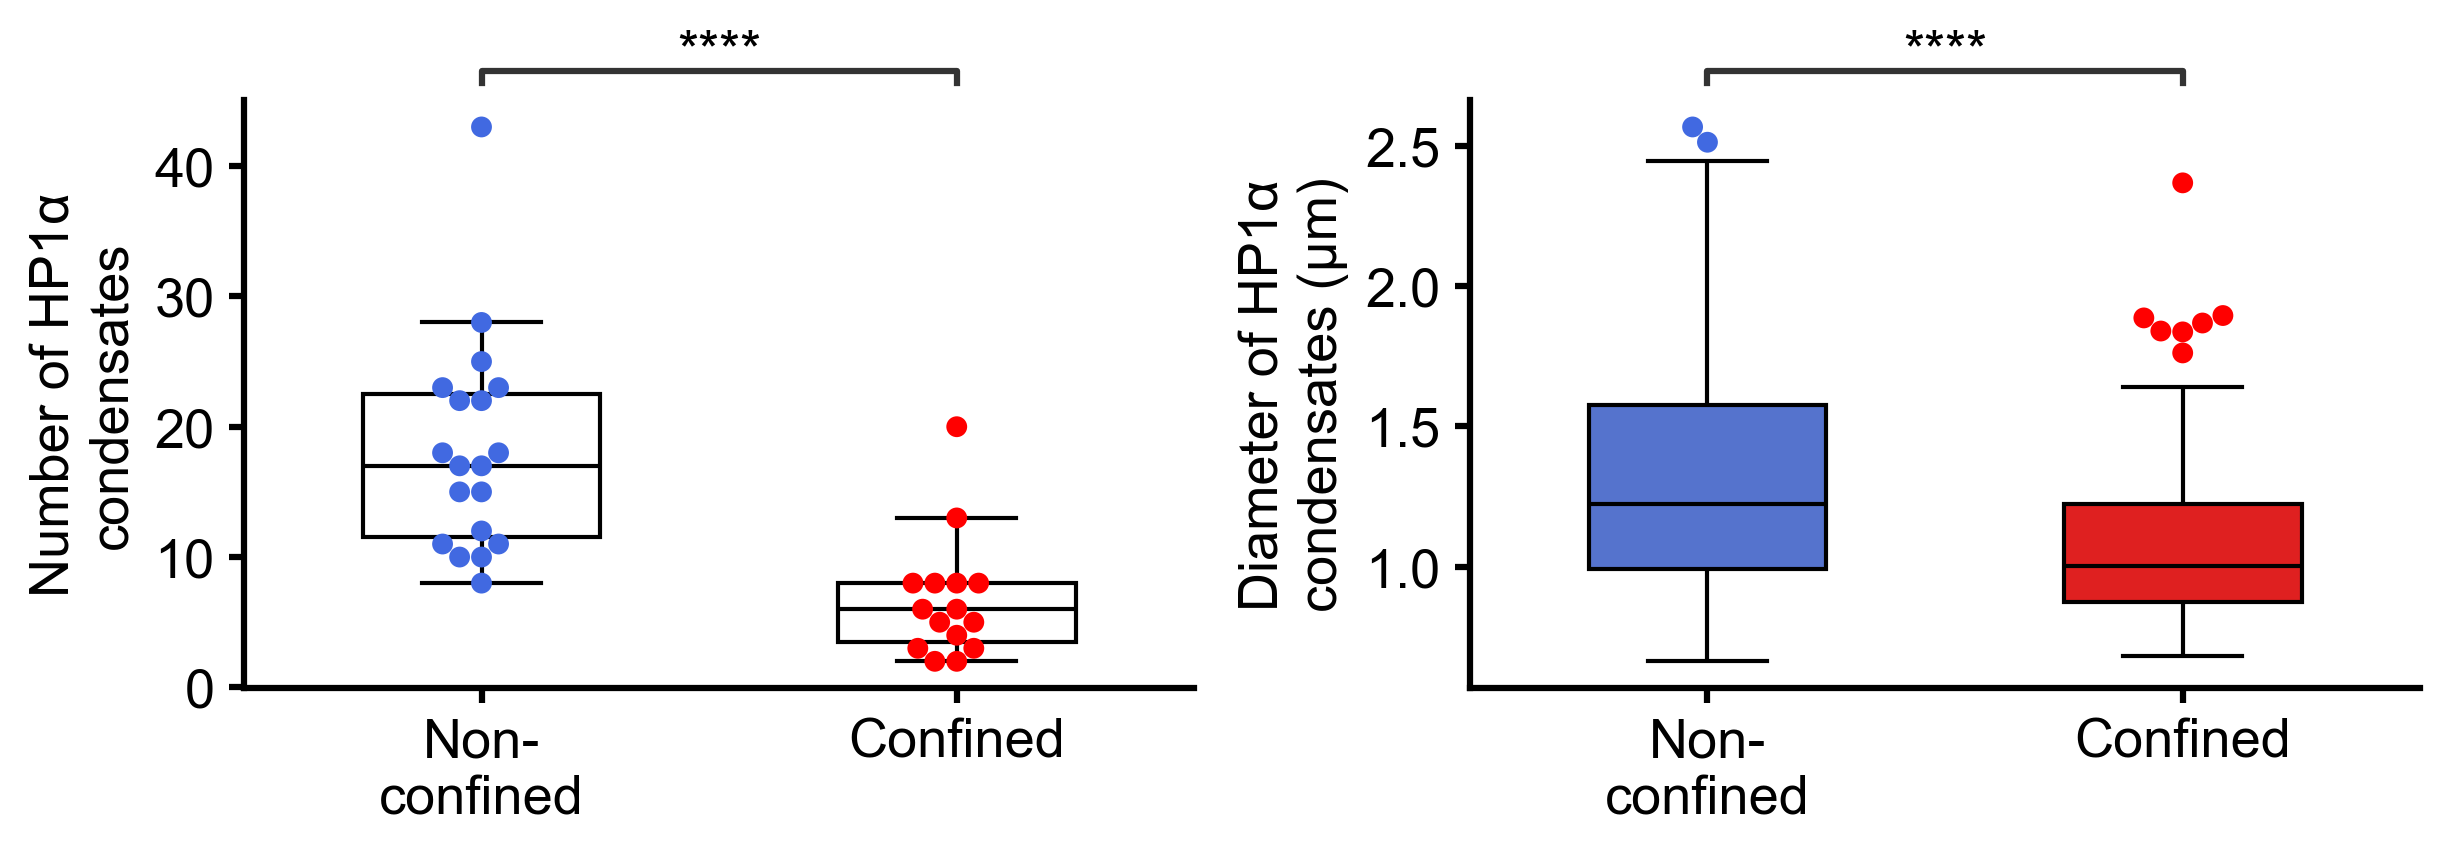

In [50]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 75

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=False
)

labels = ["Non-Confined", "Confined"]
my_pal = {labels[0]: "royalblue", labels[1]: "red"}

feature = "Number of total aggregates"
sns.boxplot(
    data=df_sum_IMR90,
    x="Condition",
    order=labels,
    y=feature,
    # palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(data=df_sum_IMR90, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[0], size=5)

axes[0].set(ylabel="Number of HP1α\ncondensates")
# axes[0].set_ylim(0, 40)
axes[0].set(xlabel=None)

pairs = [(labels[0], labels[1])]

annotator = Annotator(ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Condition", y=feature, order=labels)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

feature = "x_length_y"
sns.boxplot(
    data=df_IMR90,
    x="Condition",
    order=labels,
    y=feature,
    palette=my_pal,
    color="white",
    width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


# outliers_df_HeLa = df_IF_all[(df_IF_all["Condition"] == labels[1]) & (df_IF_all[feature] > 1.5)]
outliers_df_IMR90_nc = df_IMR90[(df_IMR90["Condition"] == labels[0]) & (df_IMR90[feature] > 2.45)]
outliers_df_IMR90_conf = df_IMR90[(df_IMR90["Condition"] == labels[1]) & (df_IMR90[feature] > 1.65)]

outliers_df_combined = pd.concat([outliers_df_IMR90_nc, outliers_df_IMR90_conf])

sns.swarmplot(data=outliers_df_combined, x="Condition", y=feature, order=labels, palette=my_pal, ax=axes[1], size=5)


axes[1].set(ylabel="Diameter of HP1α\ncondensates (µm)")
# axes[1].set_ylim(0, 2.5)
axes[1].set(xlabel=None)

pairs = [(labels[0], labels[1])]

annotator = Annotator(ax=axes[1], pairs=pairs, data=df_IMR90, x="Condition", y=feature, order=labels)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)


new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_IMR90)


plt.savefig("../../Figures/Supplementary/Suppl_Figure4B_C.pdf", bbox_inches="tight", dpi=300)


plt.show()